# Problem statement-To find out whether the person is vaccinated or not
# dependent variable-h1n1_vaccine

In [ ]:
###basic and most important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#data processing functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [ ]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.shape

(26707, 34)

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

<Axes: xlabel='h1n1_worry', ylabel='count'>

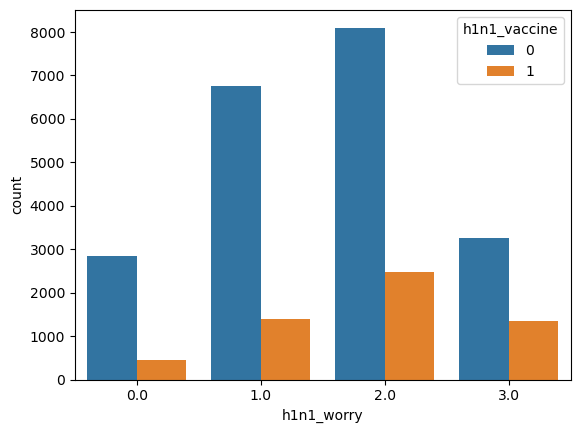

In [ ]:
sns.countplot(x="h1n1_worry",hue="h1n1_vaccine",data=df)

<Axes: xlabel='h1n1_awareness', ylabel='count'>

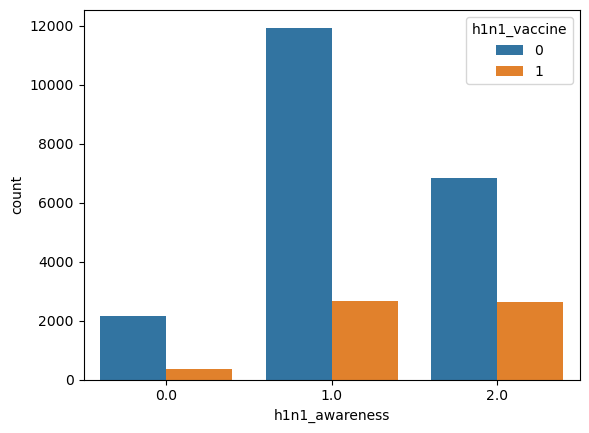

In [ ]:
sns.countplot(x="h1n1_awareness",hue="h1n1_vaccine",data=df)

In [ ]:
correlation_mat=df.corr()

<Axes: >

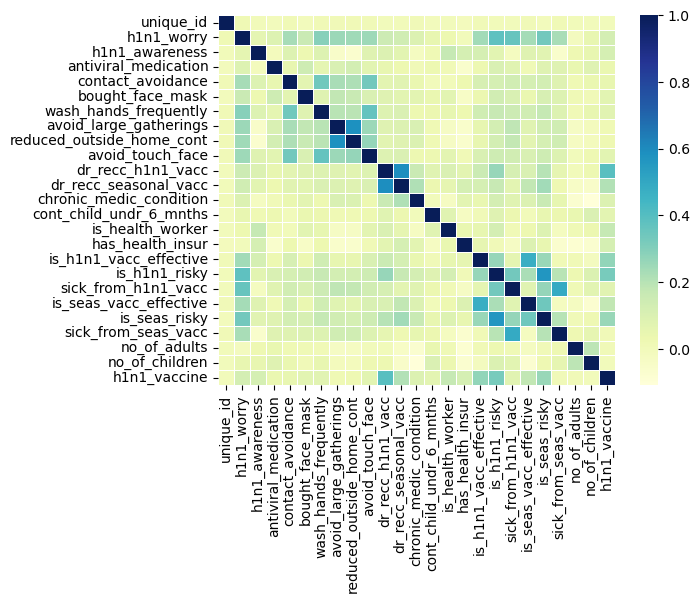

In [ ]:
sns.heatmap(correlation_mat, annot=False, linewidths=.5, cmap="YlGnBu")

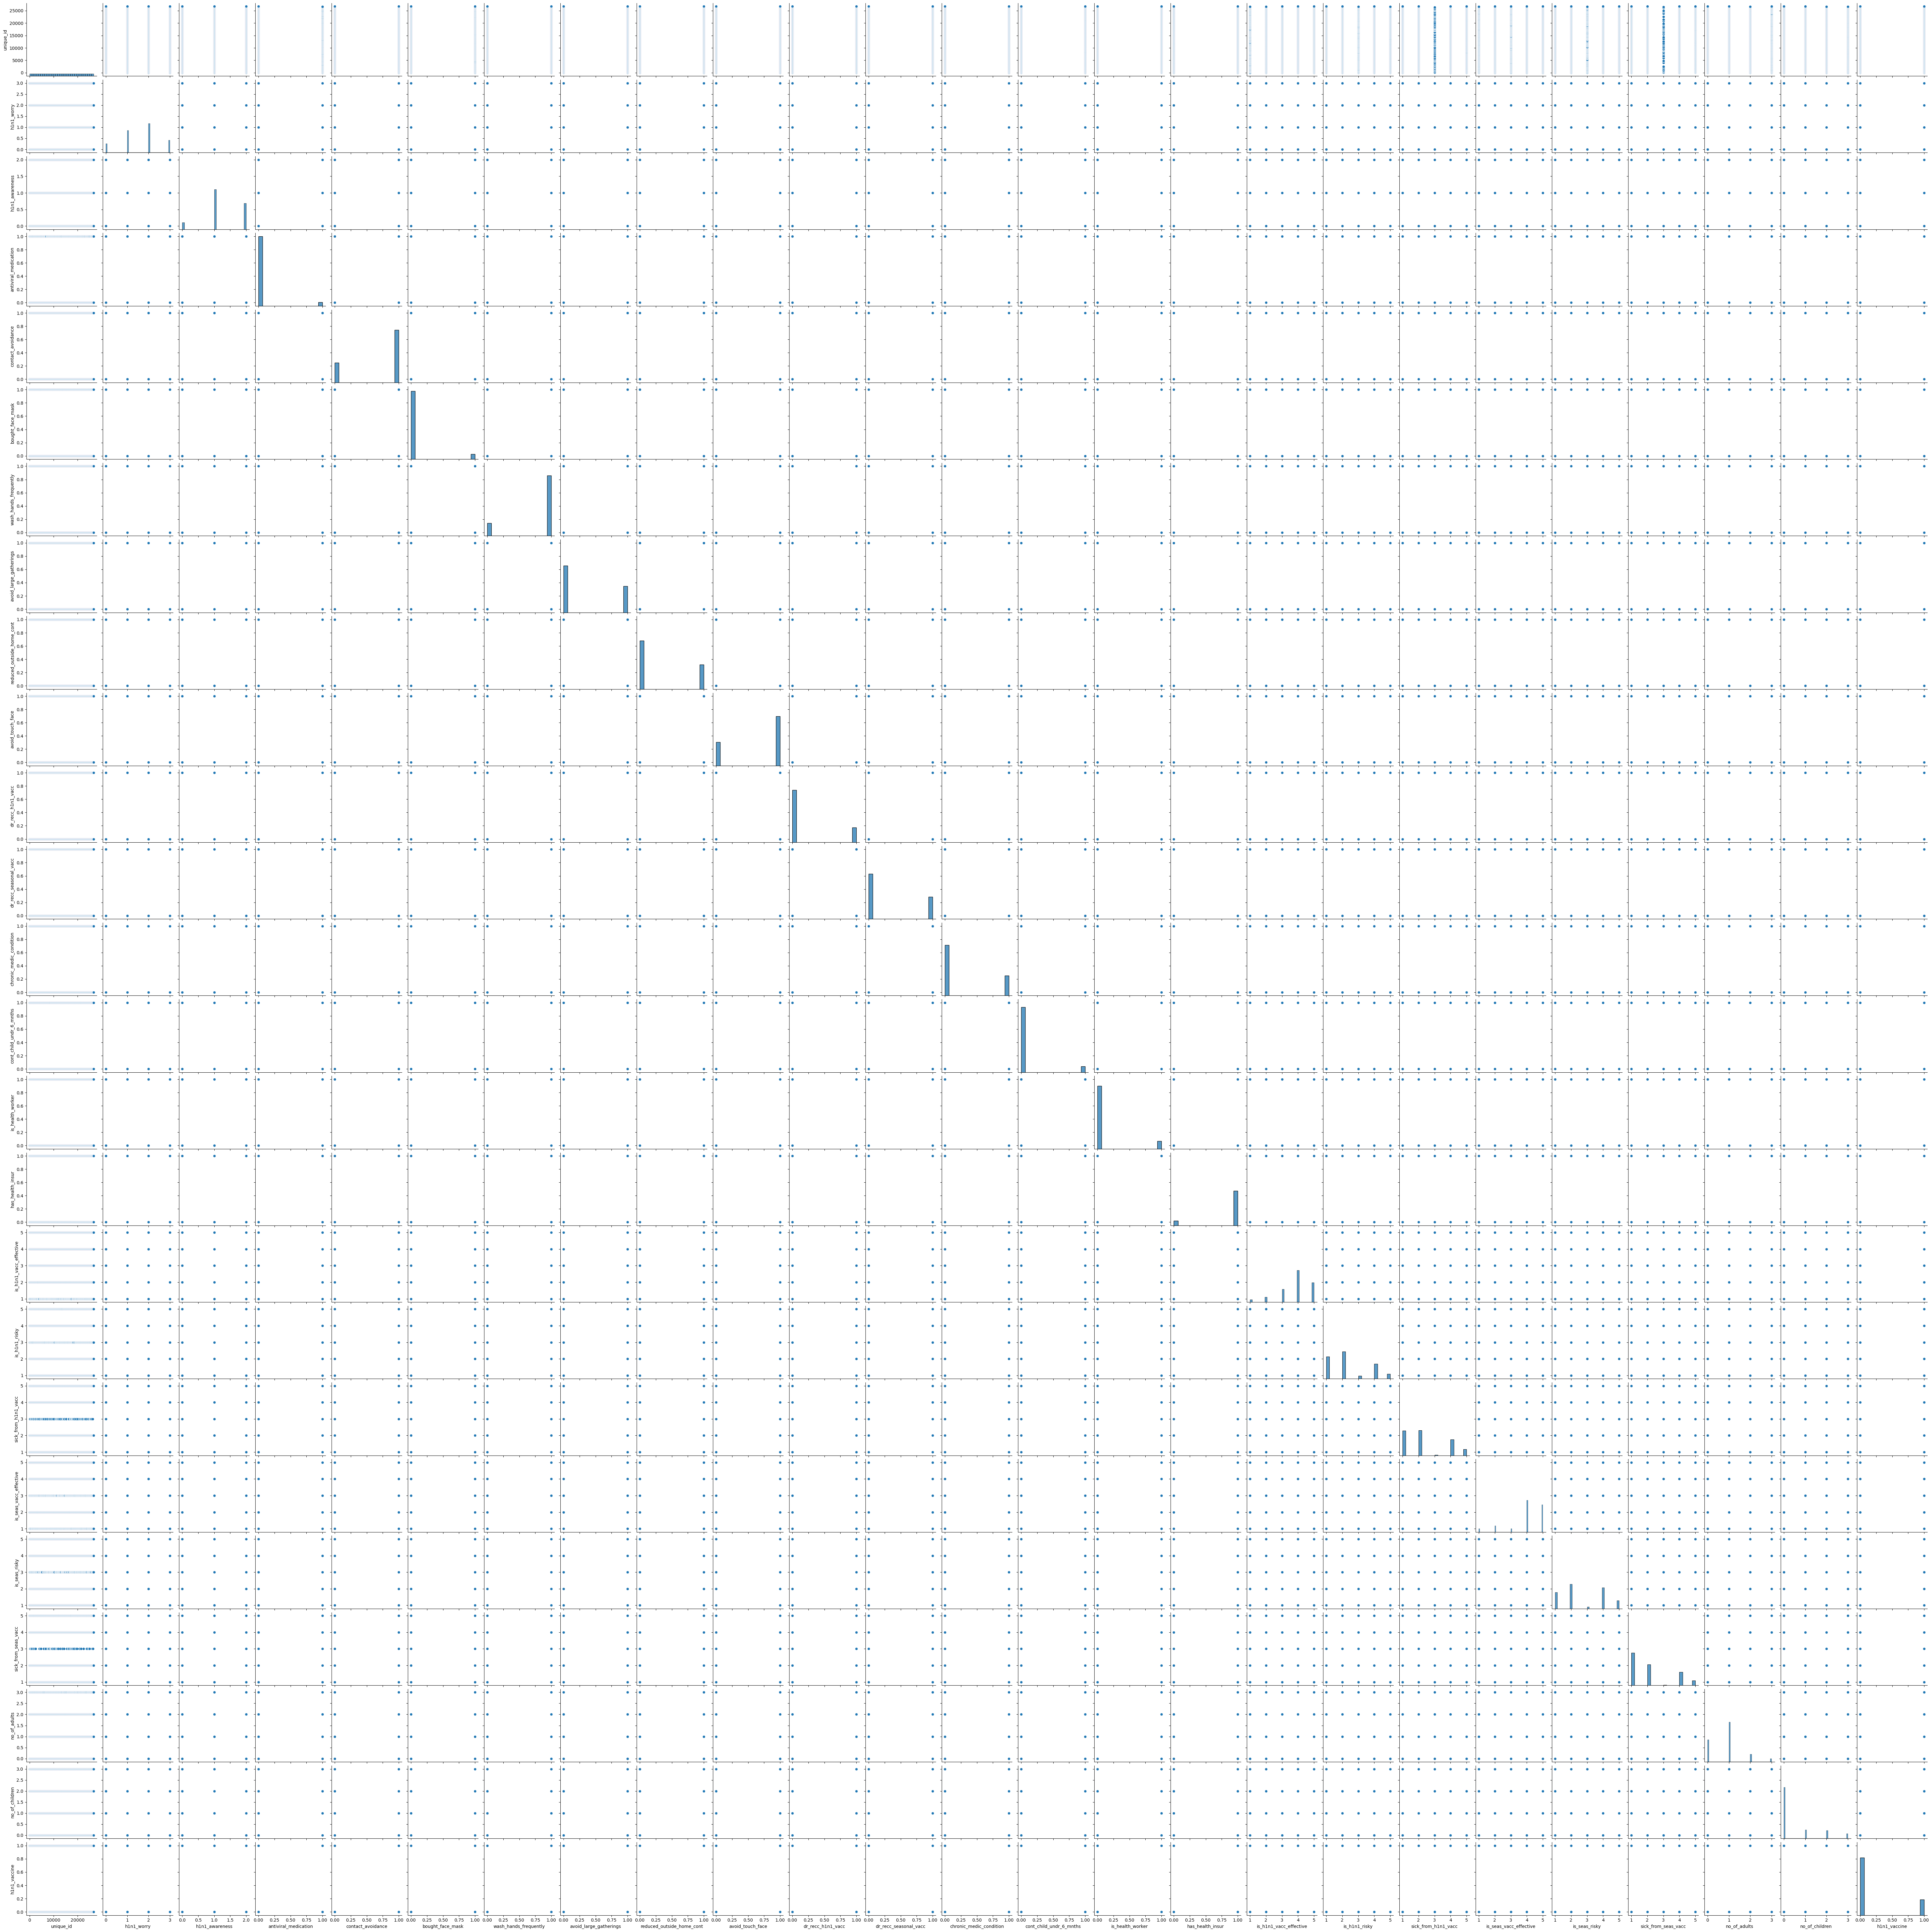

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


# checking for the outliers

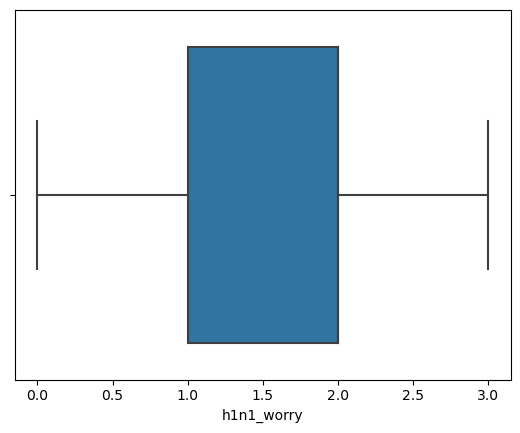

In [ ]:
sns.boxplot(x=df['h1n1_worry'])
plt.show()

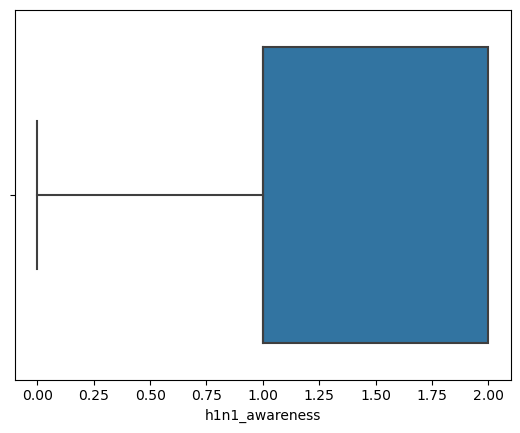

In [ ]:
sns.boxplot(x=df['h1n1_awareness'])
plt.show()

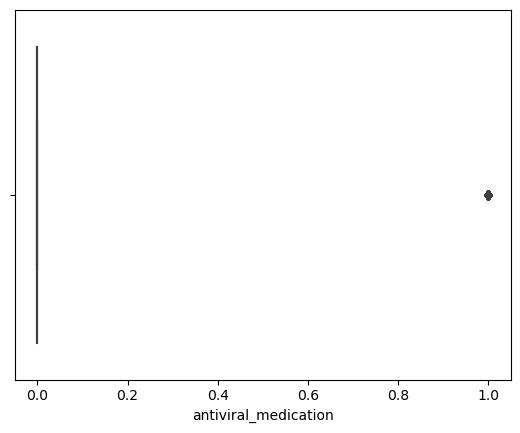

In [ ]:
sns.boxplot(x=df['antiviral_medication'])
#here plot contains one dot and a line which is 0 and 1 so we will not remove the outlier
plt.show()

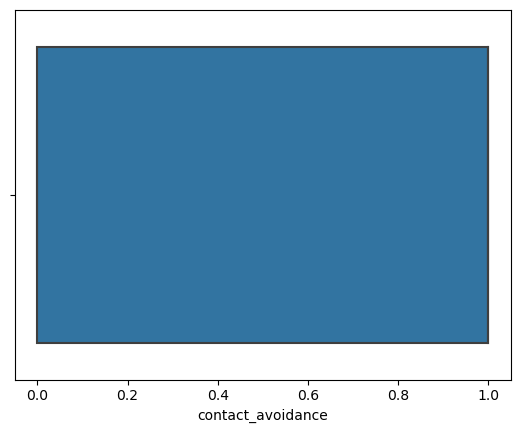

In [ ]:
sns.boxplot(x=df['contact_avoidance'])
plt.show()

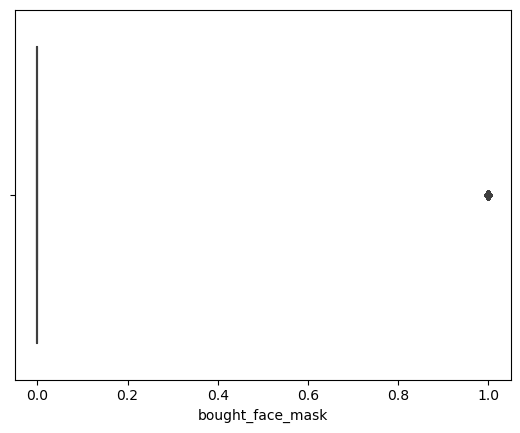

In [ ]:
sns.boxplot(x=df['bought_face_mask'])
plt.show()
#here plot contains one dot and a line which is 0 and 1 so we will not remove the outlier

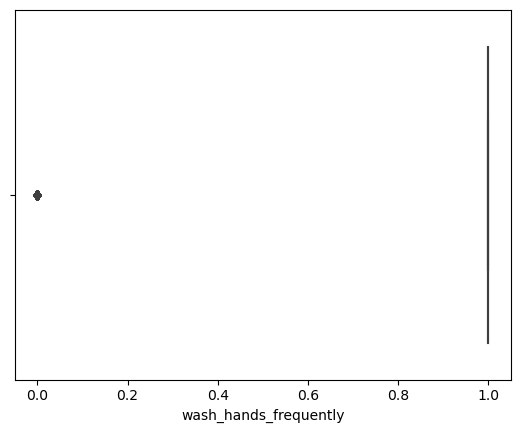

In [ ]:
sns.boxplot(x=df['wash_hands_frequently'])
plt.show()
#here plot contains one dot and a line which is 0 and 1 so we will not remove the outlier

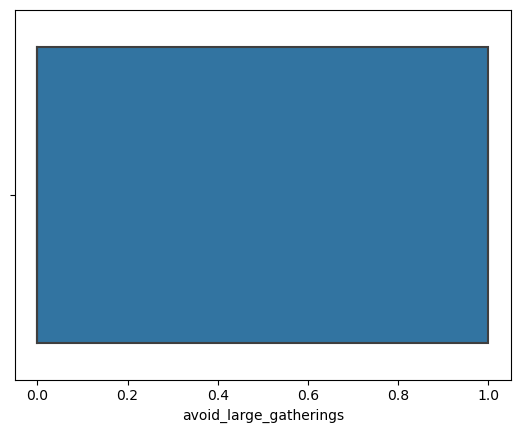

In [ ]:
sns.boxplot(x=df['avoid_large_gatherings'])
plt.show()

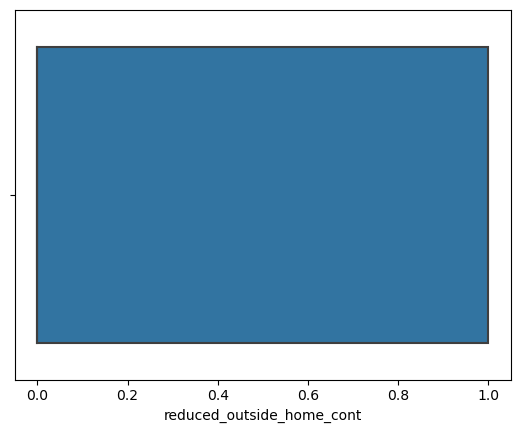

In [ ]:
sns.boxplot(x=df['reduced_outside_home_cont'])
plt.show()

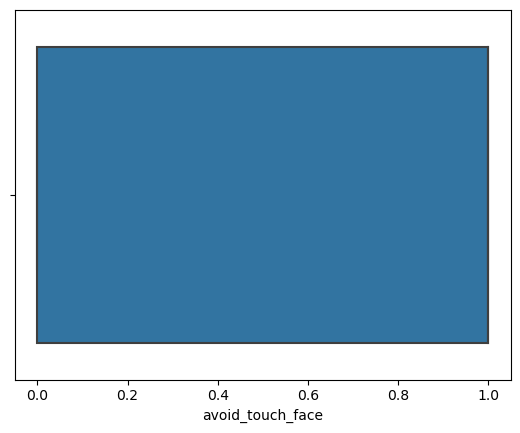

In [ ]:
sns.boxplot(x=df['avoid_touch_face'])
plt.show()

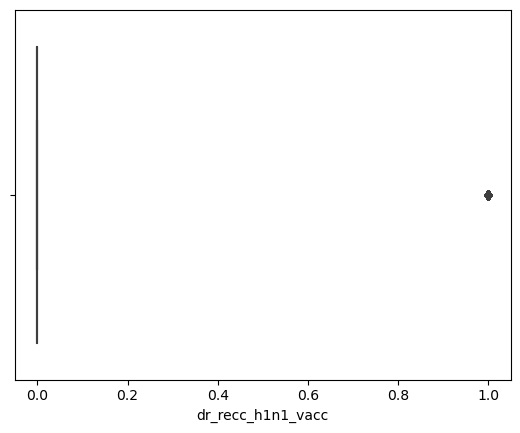

In [ ]:
sns.boxplot(x=df['dr_recc_h1n1_vacc'])
plt.show()
#here plot contains one dot and a line which is 0 and 1 so we will not remove the outlier

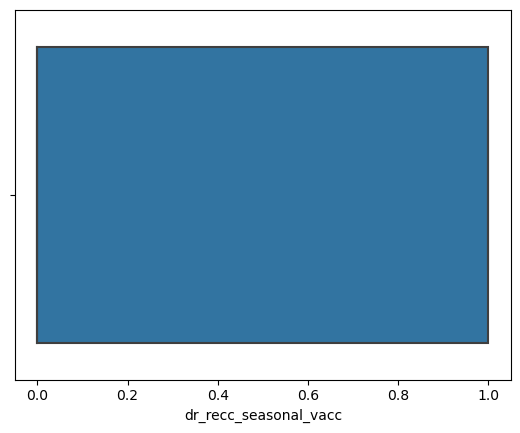

In [ ]:
sns.boxplot(x=df['dr_recc_seasonal_vacc'])
plt.show()

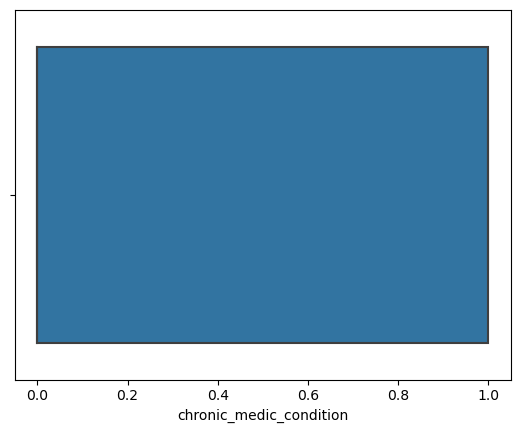

In [ ]:
sns.boxplot(x=df['chronic_medic_condition'])
plt.show()

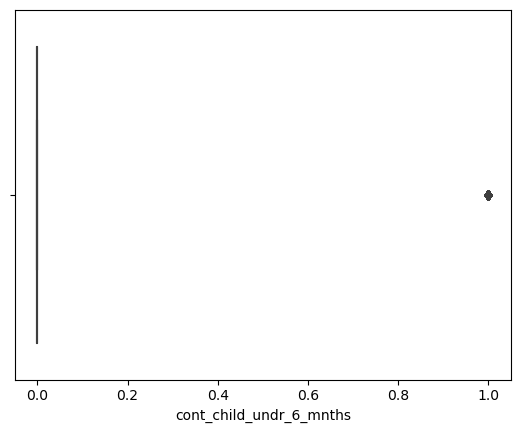

In [ ]:
sns.boxplot(x=df['cont_child_undr_6_mnths'])
plt.show()
#here plot contains one dot and a line which is 0 and 1 so we will not remove the outlier

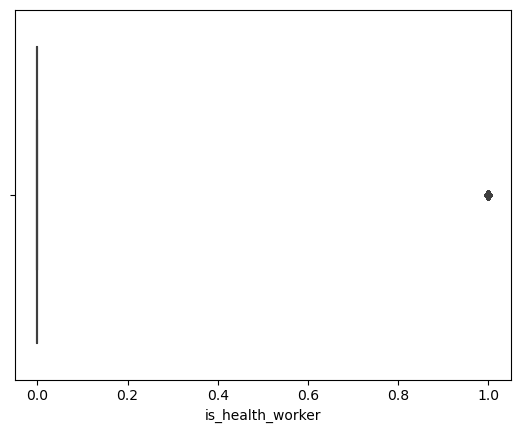

In [ ]:
sns.boxplot(x=df['is_health_worker'])
plt.show()
#here plot contains one dot and a line which is 0 and 1 so we will not remove the outlier

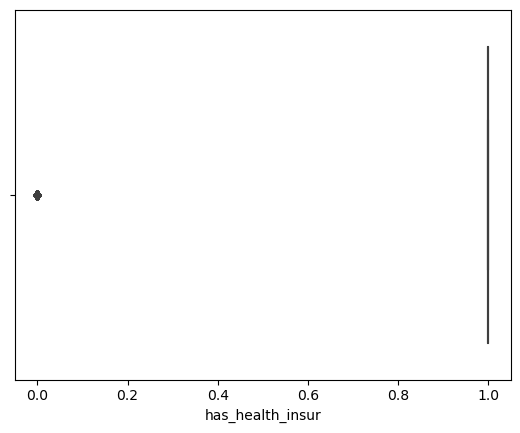

In [ ]:
sns.boxplot(x=df['has_health_insur'])
plt.show()
#here plot contains one dot and a line which is 0 and 1 so we will not remove the outlier

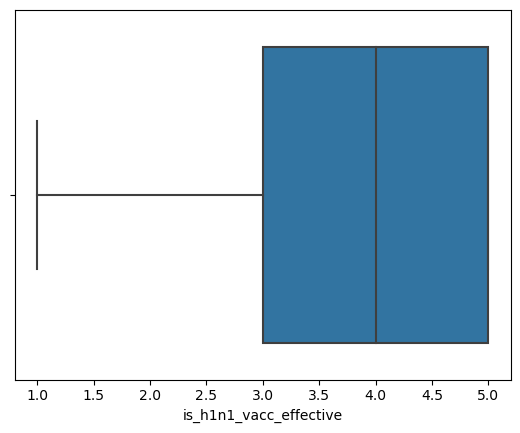

In [ ]:
sns.boxplot(x=df['is_h1n1_vacc_effective'])
plt.show()

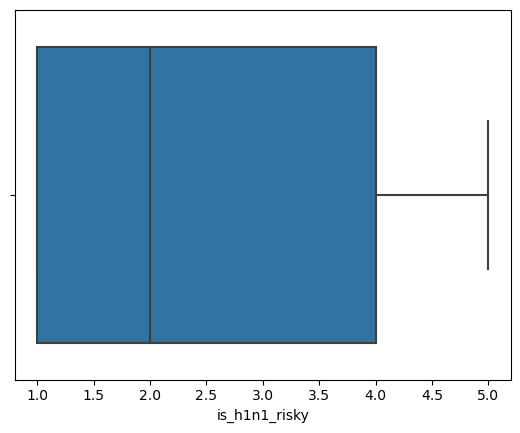

In [ ]:
sns.boxplot(x=df['is_h1n1_risky'])
plt.show()

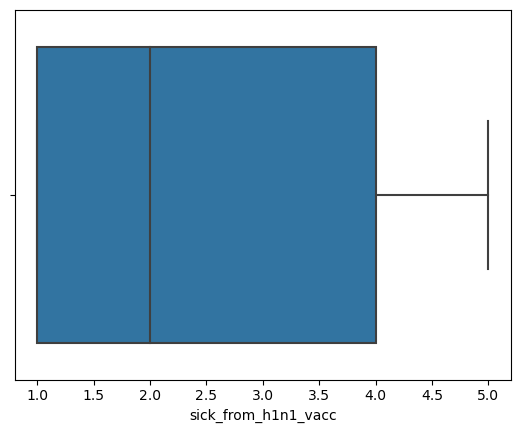

In [ ]:
sns.boxplot(x=df['sick_from_h1n1_vacc'])
plt.show()

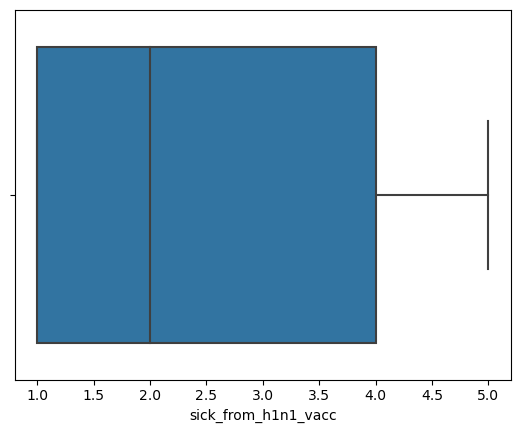

In [ ]:
sns.boxplot(x=df['sick_from_h1n1_vacc'])
plt.show()

# Checking for the missing values

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: >

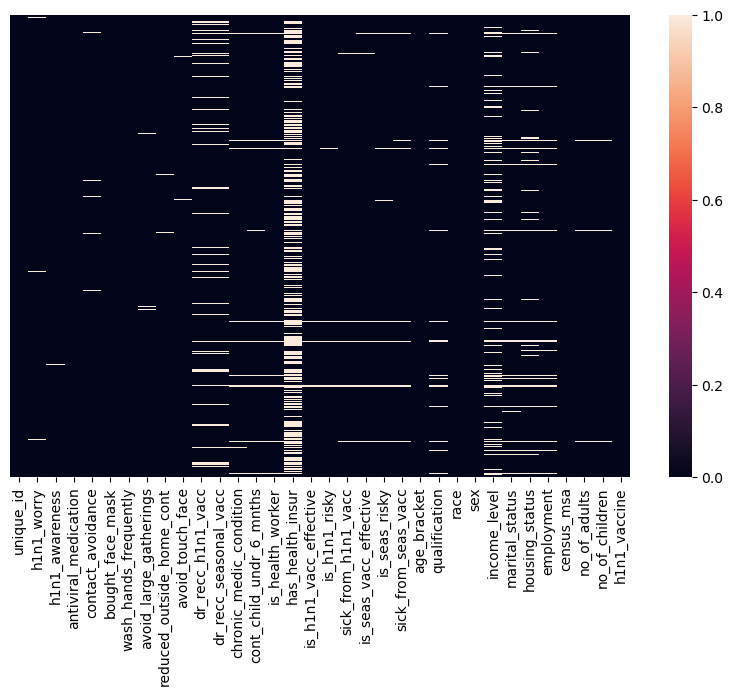

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

# Replacing the missing values

In [ ]:
# Replacing the missing values which are numerical with median
df["h1n1_worry"].fillna(df["h1n1_worry"].median(),inplace=True)

df["h1n1_awareness"].fillna(df["h1n1_awareness"].median(),inplace=True)

df["antiviral_medication"].fillna(df["antiviral_medication"].median(),inplace=True)

df["contact_avoidance"].fillna(df["contact_avoidance"].median(),inplace=True)

df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].median(),inplace=True)

df["dr_recc_seasonal_vacc"].fillna(df["dr_recc_seasonal_vacc"].median(),inplace=True)

df["reduced_outside_home_cont"].fillna(df["reduced_outside_home_cont"].median(),inplace=True)

df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].median(),inplace=True)

df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].median(),inplace=True)

df["is_health_worker"].fillna(df["is_health_worker"].median(),inplace=True)

df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].median(),inplace=True)

df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].median(),inplace=True)

df["sick_from_h1n1_vacc"].fillna(df["sick_from_h1n1_vacc"].median(),inplace=True)

df["is_seas_vacc_effective"].fillna(df["is_seas_vacc_effective"].median(),inplace=True)

df["is_seas_risky"].fillna(df["is_seas_risky"].median(),inplace=True)

df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].median(),inplace=True)

df["bought_face_mask"].fillna(df["bought_face_mask"].median(),inplace=True)

df["wash_hands_frequently"].fillna(df["wash_hands_frequently"].median(),inplace=True)

df["avoid_large_gatherings"].fillna(df["avoid_large_gatherings"].median(),inplace=True)

df["avoid_touch_face"].fillna(df["avoid_touch_face"].median(),inplace=True)

df["has_health_insur"].fillna(df["has_health_insur"].median(),inplace=True)


#filling the null values which are categorical with mode
df['age_bracket'].fillna(df['age_bracket'].mode()[0],inplace=True)

df['qualification'].fillna(df['qualification'].mode()[0],inplace=True)

df['race'].fillna(df['race'].mode()[0],inplace=True)

df['sex'].fillna(df['sex'].mode()[0],inplace=True)

df['income_level'].fillna(df['income_level'].mode()[0],inplace=True)

df['marital_status'].fillna(df['marital_status'].mode()[0],inplace=True)

df['housing_status'].fillna(df['housing_status'].mode()[0],inplace=True)

df['employment'].fillna(df['employment'].mode()[0],inplace=True)

df['census_msa'].fillna(df['census_msa'].mode()[0],inplace=True)

df['no_of_adults'].fillna(df['no_of_adults'].mode()[0],inplace=True)

df['no_of_children'].fillna(df['no_of_children'].mode()[0],inplace=True)



In [ ]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

<Axes: >

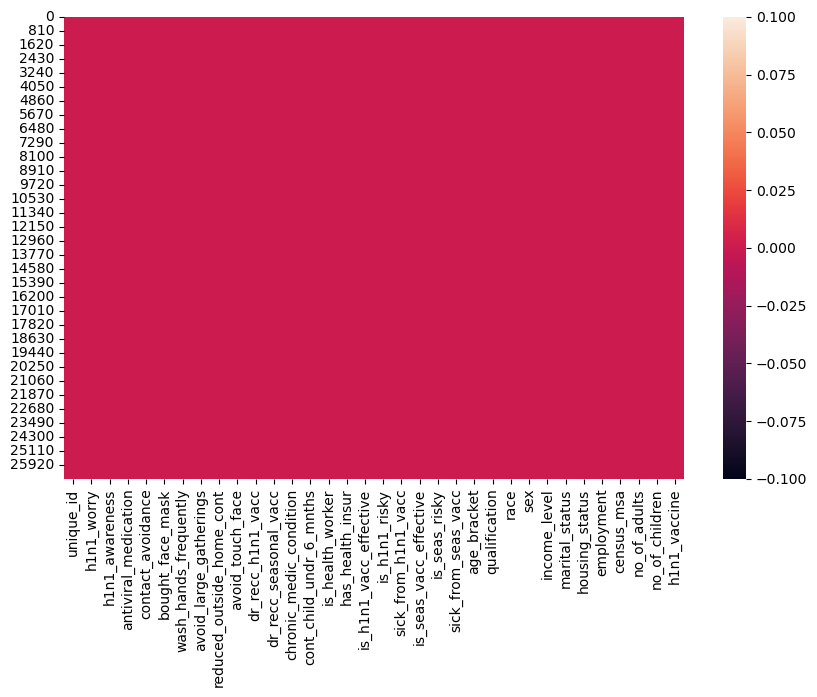

In [ ]:
#heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

# Testing and training the dataset

In [ ]:
#dividing data into input X variables and target Y variable
X=df.drop(['h1n1_vaccine','unique_id','qualification','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','sex','race','income_level','marital_status','housing_status','employment','census_msa','has_health_insur','is_health_worker','age_bracket'],axis=1)
y=df['h1n1_vaccine']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# Using different types of classification model

# Decision Tree Classification

In [ ]:
model_1=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
# using hyper parameters such as max_depth to improvee the score because it was a overfitting model.
model_1.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
model_1.score(X_train,y_train)

0.8037873114368247

In [ ]:
model_1.score(X_test,y_test)# diff between train and test score is less than 5 % therefore it is a good model

0.7998252839136404

In [ ]:
predictions=model_1.predict(X_test)
accuracy_score(y_test,predictions)

0.7998252839136404

<Axes: >

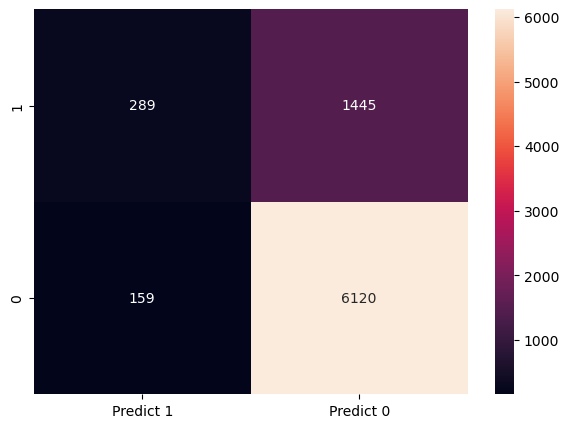

In [ ]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')



# Ada Boost Classification

In [ ]:
model_2=AdaBoostClassifier()
model_2.fit(X_train,y_train)


AdaBoostClassifier()

In [ ]:
model_2.score(X_train,y_train)

0.8101529902642559

In [ ]:
model_2.score(X_test,y_test)# diff between train and test score is less than 5 % therefore it is a good model

0.8066891301634843

# Gradient Boosting Classification

In [ ]:
model_3=GradientBoostingClassifier()
model_3.fit(X_train,y_train)


GradientBoostingClassifier()

In [ ]:
model_3.score(X_train,y_train)

0.8171070931849791

In [ ]:
model_3.score(X_test,y_test) # diff between train and test score is less than 5 % therefore it is a good model

0.8124298015724448

# Random Forest Classification

In [ ]:
model_4=RandomForestClassifier(max_depth=3)
model_4.fit(X_train,y_train)
# using hyper parameters such as max_depth to improvee the score because it was a overfitting model.


RandomForestClassifier(max_depth=3)

In [ ]:
model_4.score(X_train,y_train)

0.7892906815020863

In [ ]:
model_4.score(X_test,y_test)# diff between train and test score is less than 5 % therefore it is a good model

0.7836016473231

# Super  vector classification

In [ ]:
from sklearn.svm import SVC
model_5=SVC()
model_5.fit(X_train,y_train)


SVC()

In [ ]:
model_5.score(X_train,y_train)

0.8130951107307157

In [ ]:
model_5.score(X_test,y_test) # diff between train and test score is less than 5 % therefore it is a good model

0.8091850742543367

# Bagging classification

In [ ]:
m=BaggingClassifier(n_estimators=100,base_estimator=model_1,random_state=0)
m.fit(X_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=0),
                  n_estimators=100, random_state=0)

In [ ]:
m.score(X_train,y_train)

0.806889911201455

In [ ]:
m.score(X_test,y_test)# diff between train and test score is less than 5 % therefore it is a good model

0.8083114938225384